# **Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

# **Load Dataset**

In [2]:
df=pd.read_excel('/content/financial_loan.xlsx')

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


# **MetaData Of Data**

In [4]:
df.shape #(r,c)

(38576, 24)

In [5]:
print("No of Rows:",df.shape[0])

No of Rows: 38576


In [6]:
print("No of Columns:",df.shape[1])

No of Columns: 24


In [7]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [8]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


# **KPI**

## **Total Loan Application**

In [10]:
total_loan_application=df['id'].count()
print("Total Loan Application:",total_loan_application)

Total Loan Application: 38576


## **MTD Total Loan Applications**

In [11]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_total_loan_application=mtd_data['id'].count()
print(f"MTD Total Loan Applications(for{latest_issue_date.strftime('%B %Y')}): {mtd_total_loan_application}")

MTD Total Loan Applications(forDecember 2021): 4314


## **Total Funded Amount**

In [13]:
total_funded_amount=df['loan_amount'].sum()
total_funded_amount_millions=total_funded_amount/1000000
print(f"Total Funded Amount: ${total_funded_amount_millions:.2f} Millions")

Total Funded Amount: $435.76 Millions


## **MTD Total Funded Amount**

In [14]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions=mtd_total_funded_amount/1000000
print(f"MTD Total Funded Amount(for{latest_issue_date.strftime('%B %Y')}): ${mtd_total_funded_amount_millions:.2f} Millions")

MTD Total Funded Amount(forDecember 2021): $53.98 Millions


## **Total Amount Receieved**

In [17]:
total_amount_received=df['total_payment'].sum()
total_amount_received_millions=total_amount_received/1000000
print(f"Total Amount Received: ${total_amount_received_millions:.2f} Millions")

Total Amount Received: $473.07 Millions


## **MTD Total Amount Receieved**

In [20]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]
mtd_total_amount_received=mtd_data['loan_amount'].sum()
mtd_total_amount_received_millions=mtd_total_amount_received/1000000
print(f"MTD Total Amount Received(for{latest_issue_date.strftime('%B %Y')}): ${mtd_total_amount_received_millions:.2f} Millions")

MTD Total Amount Received(forDecember 2021): $53.98 Millions


## **Average Interest Rate**

In [21]:
average_interest_rate=df['int_rate'].mean()
print(f"Average Interest Rate: {average_interest_rate:.2f}%")

Average Interest Rate: 0.12%


## **Avg Debt-to-income Ratio**

In [23]:
avg_dti=df['dti'].mean()
print(f"Avg Debt-to-income Ratio: {avg_dti:.2f}")

Avg Debt-to-income Ratio: 0.13


## **Good Loan Metrices**

In [24]:
good_loans=df[df['loan_status'].isin(["Fully Paid","Current"])]
total_loan_application=df['id'].count()

good_loan_applications=good_loans['id'].count()
good_loan_funded_amount=good_loans['loan_amount'].sum()
good_loan_received_amount=good_loans['total_payment'].sum()

good_loan_funded_amount_millions=good_loan_funded_amount/1000000
good_loan_received_amount_millions=good_loan_received_amount/1000000

good_loan_percentage=(good_loan_applications/total_loan_application)*100

print("Good Loan Applications",good_loan_applications)
print("Good Loan Funded Amount",f"${good_loan_funded_amount_millions:.2f} Millions")
print("Good Loan Received Amount",f"${good_loan_received_amount_millions:.2f} Millions")
print("Good Loan Percentage",f"{good_loan_percentage:.2f}%")

#good_loans_count=good_loans['id'].count()
#good_loan_percentage=(good_loans_count/total_loan_application)*100

Good Loan Applications 33243
Good Loan Funded Amount $370.22 Millions
Good Loan Received Amount $435.79 Millions
Good Loan Percentage 86.18%


## **Bad Loan Metrices**

In [28]:
bad_loans=df[df['loan_status'].isin(["Charged Off"])]
total_loan_applications=df['id'].count()

bad_loan_applications=bad_loans['id'].count()
bad_loan_funded_amount=bad_loans['loan_amount'].sum()
bad_loan_received_amount=bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions=bad_loan_funded_amount/1000000
bad_loan_received_amount_millions=bad_loan_received_amount/1000000

bad_loan_percentage=(bad_loan_applications/total_loan_application)*100

print("Bad Loan Applications",bad_loan_applications)
print("Bad Loan Funded Amount",f"${bad_loan_funded_amount_millions:.2f} Millions")
print("Bad Loan Received Amount",f"${bad_loan_received_amount_millions:.2f} Millions")
print("Bad Loan Percentage",f"{bad_loan_percentage:.2f}%")



Bad Loan Applications 5333
Bad Loan Funded Amount $65.53 Millions
Bad Loan Received Amount $37.28 Millions
Bad Loan Percentage 13.82%


# **Chart**

## **Monthly Trends by Issue Date for Total Funded Amount**

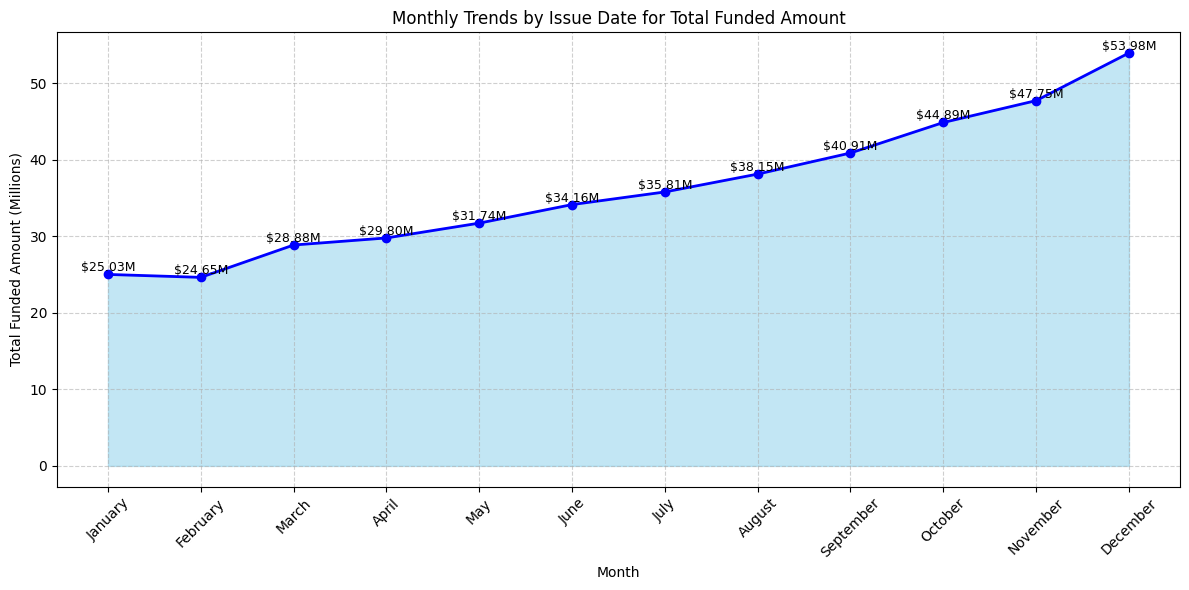

In [31]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_num=lambda x: x['issue_date'].dt.month,
              month_name=lambda x: x['issue_date'].dt.month_name())
      .groupby(['month_num','month_name'])['loan_amount'].sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
      .sort_values('month_num')
)

plt.figure(figsize=(12,6))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'],
                 color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'],
         marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels
for i, row in monthly_funded.iterrows():
    plt.text(row['month_name'], row['loan_amount_millions'],
             f"${row['loan_amount_millions']:.2f}M",
             ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Month')
plt.ylabel('Total Funded Amount (Millions)')
plt.title('Monthly Trends by Issue Date for Total Funded Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## **Monthly Trends by Issue Date for Total Amount Received**

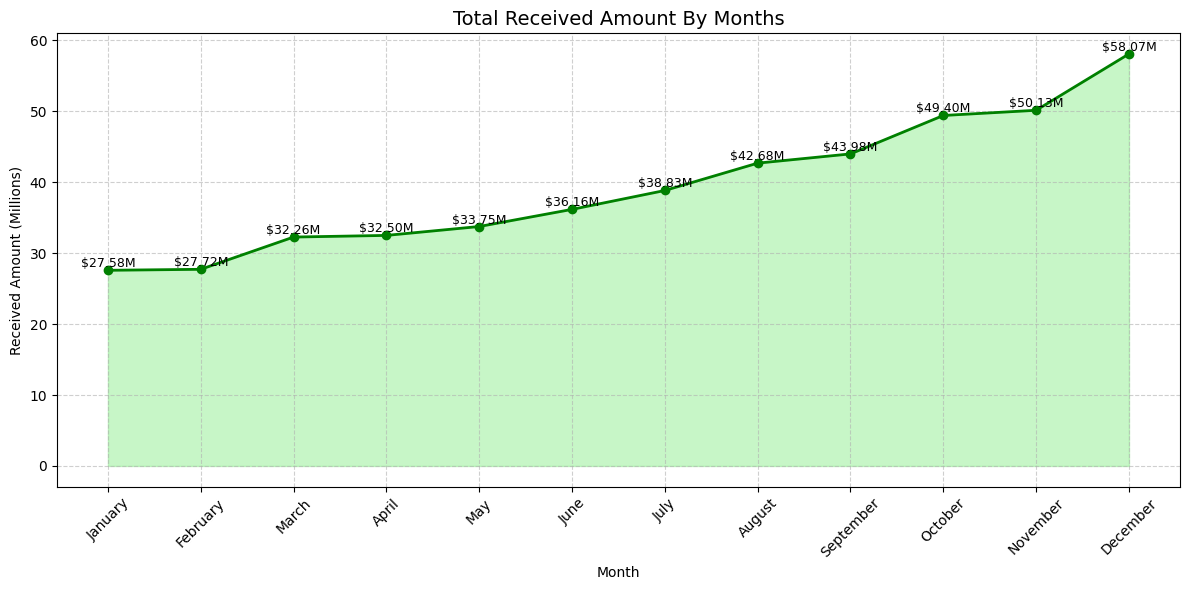

In [34]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_num=lambda x: x['issue_date'].dt.month,
              month_name=lambda x: x['issue_date'].dt.month_name())
      .groupby(['month_num','month_name'])['total_payment'].sum()
      .div(1_000_000)
      .reset_index(name='received_amount_millions')
      .sort_values('month_num')
)

plt.figure(figsize=(12,6))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'],
                 color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'],
         marker='o', linestyle='-', color='green', linewidth=2)

# Add labels
for i, row in monthly_received.iterrows():
    plt.text(row['month_name'], row['received_amount_millions'],
             f"${row['received_amount_millions']:.2f}M",
             ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Month')
plt.ylabel('Received Amount (Millions)')
plt.title('Total Received Amount By Months', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **Monthly Trends by Issue Date for Total Loan Applications**

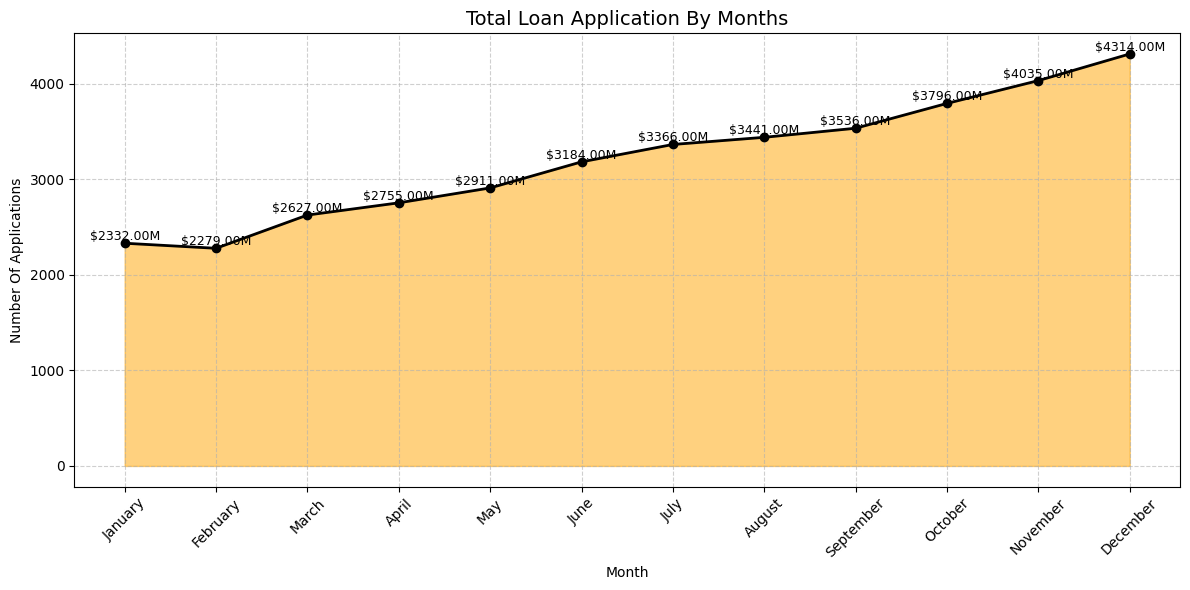

In [36]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_num=lambda x: x['issue_date'].dt.month,
              month_name=lambda x: x['issue_date'].dt.month_name())
      .groupby('month_name',sort=False)['id']
      .count()
      .reset_index(name='loan_application_count')
)

plt.figure(figsize=(12,6))
plt.fill_between(monthly_received['month_name'], monthly_received['loan_application_count'],
                 color='orange', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['loan_application_count'],
         marker='o', linestyle='-', color='black', linewidth=2)

# Add labels
for i, row in monthly_received.iterrows():
    plt.text(row['month_name'], row['loan_application_count'],
             f"${row['loan_application_count']:.2f}M",
             ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Month')
plt.ylabel('Number Of Applications')
plt.title('Total Loan Application By Months', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **Regional Analysis by State for Total Funded Amount**

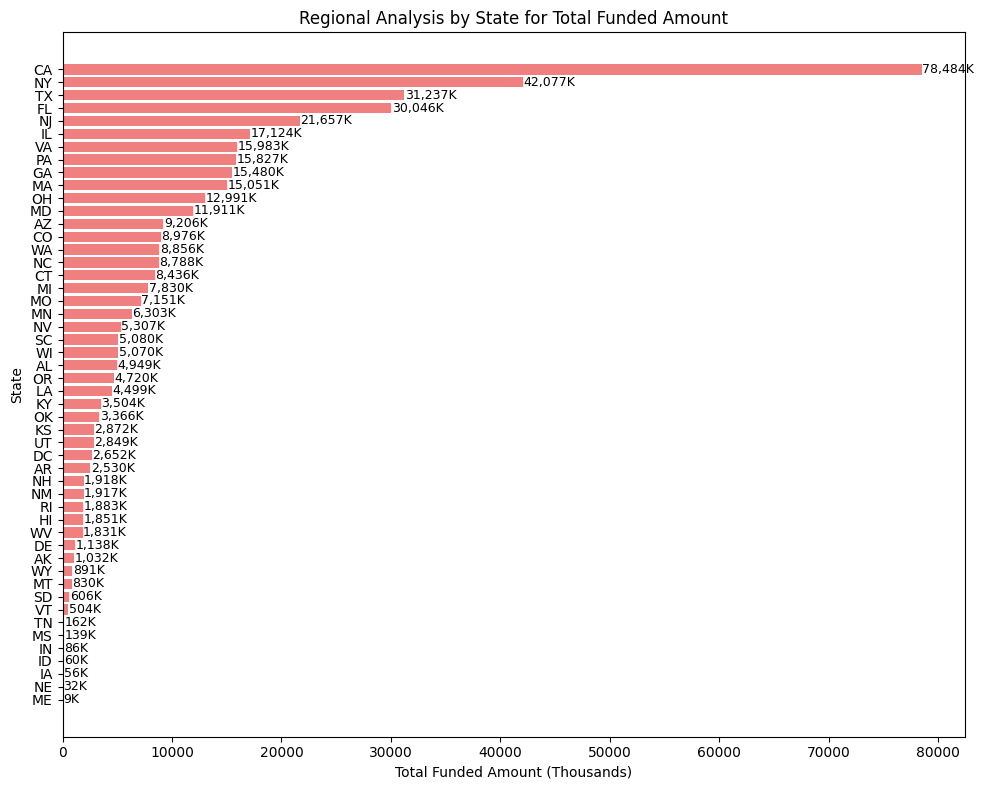

In [45]:
plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}K', ha='left', va='center', fontsize=9)

plt.xlabel('Total Funded Amount (Thousands)')
plt.ylabel('State')
plt.title('Regional Analysis by State for Total Funded Amount')
plt.tight_layout()
plt.show()


## **Loan Term Analysis By Total Funded Amount**

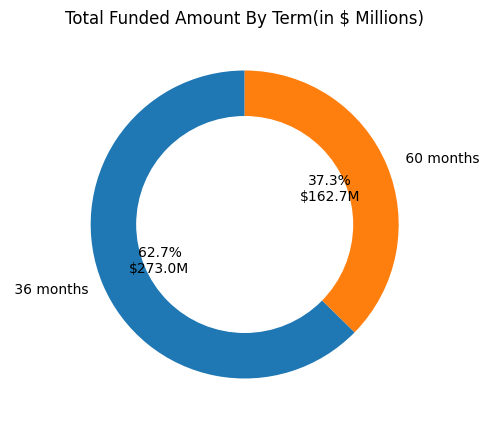

In [48]:
term_funding_millions=df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.7,color='white'))
plt.title('Total Funded Amount By Term(in $ Millions)')
plt.show()

## **Home Ownership By Total Funded Amount**

In [51]:
home_funding=df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']=home_funding['loan_amount']/1000000

fig=px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount By Home Ownership($Millions)'
)
fig.show()